<a href="https://colab.research.google.com/github/rtajeong/DSAC_Lab3_4/blob/master/deu_lab2_xor_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# EXOR problem with tensorflow 2.0

In [13]:
# tf.random.set_seed(17)

X = np.array([[0.,0.],
              [1.,0.],
              [0.,1.],
              [1.,1.]], dtype="float32")
Y = np.array([[0.],
              [1.],
              [1.],
              [0.]], dtype="float32")


[[0.46415785]
 [0.48282027]
 [0.5059061 ]
 [0.5246037 ]] [[0.]
 [0.]
 [1.]
 [1.]] 0.5


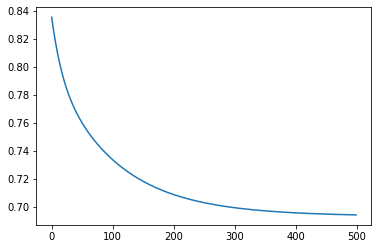

In [14]:

W = tf.Variable(tf.random.normal([2,1]))
b = tf.Variable(tf.random.normal([1]))
# W = tf.Variable([[3.], [7.]])
# b = tf.Variable([4.])

learning_rate = 0.1
lossHistory = []

for i in range(500):
    with tf.GradientTape() as tape:
        hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
        cost = -tf.reduce_mean(Y*tf.math.log(hypothesis) +
                               (1-Y)*tf.math.log(1-hypothesis))   # cross entropy

    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)   # W = W - ...
    b.assign_sub(learning_rate * b_grad)
    lossHistory.append(cost)

predicted = tf.cast(hypothesis > 0.5, dtype= tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

print(hypothesis.numpy(), predicted.numpy(), accuracy.numpy())
plt.plot(lossHistory)

# Using Keras function

In [15]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
[[0.5028833]
 [0.5003313]
 [0.5005737]
 [0.4980216]]


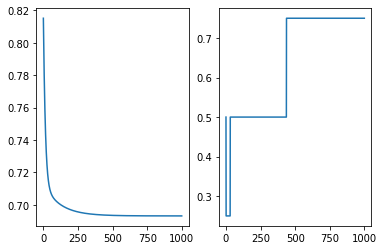

In [23]:
X = np.array([[0.,0.], [1.,0.], [0.,1.], [1.,1.]], dtype="float32")
Y = np.array([[0.], [1.], [1.], [0.]], dtype="float32")

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.summary()

model.compile(optimizer=SGD(learning_rate = 0.1),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
history = model.fit(X, Y, epochs=1000, verbose=0)
print(model.predict_proba(X))

# print(history.history.keys())
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])

# Multi-layer Perceptron (MLP)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
[[0.30804625]
 [0.7174152 ]
 [0.8150586 ]
 [0.23878515]]


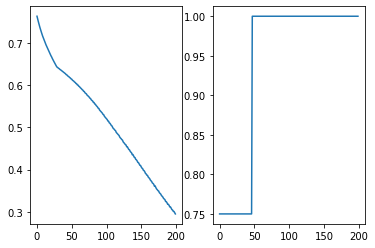

In [36]:
tf.random.set_seed(17)
X = np.array([[0.,0.], [1.,0.], [0.,1.], [1.,1.]], dtype="float32")
Y = np.array([[0.], [1.], [1.], [0.]], dtype="float32")

model = Sequential()
model.add(Dense(8, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer=SGD(learning_rate = 0.1),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
history = model.fit(X, Y, epochs=200, verbose=0)
print(model.predict_proba(X))

# print(history.history.keys())
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])

# Many layers (8 layers)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_97 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_98 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_99 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_100 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_101 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_102 (Dense)            (None, 8)               

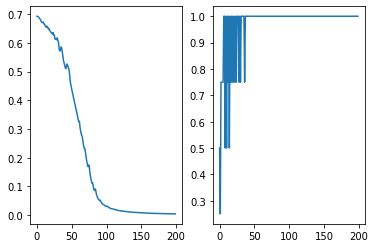

In [45]:
tf.random.set_seed(17)
X = np.array([[0.,0.], [1.,0.], [0.,1.], [1.,1.]], dtype="float32")
Y = np.array([[0.], [1.], [1.], [0.]], dtype="float32")

model = Sequential()
model.add(Dense(8, input_shape=(2,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer=SGD(learning_rate = 0.1),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
history = model.fit(X, Y, epochs=200, verbose=0)
print(model.predict_proba(X))

# print(history.history.keys())
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])